In [ ]:
# DETECTING EARLY ALZHEIMER'S (Erken Alzheimer Tespiti)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

df = pd.read_csv('oasis_longitudinal.csv')
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
df = df.loc[df['Visit']==1] # visit degerleri 1 olanlar alındı
df = df.reset_index(drop=True) # visit verilerini filtreledikten sonra dizini sıfırla
df['M/F'] = df['M/F'].replace(['F','M'], [0,1]) # M/F sutunu
df['Group'] = df['Group'].replace(['Converted'], ['Demented']) # Hedef degisken
df['Group'] = df['Group'].replace(['Demented', 'Nondemented'], [1,0]) # Hedef degisken
df = df.drop(['MRI ID', 'Visit', 'Hand'], axis=1) # Gereksiz sutunlari at
df.head()

,Subject ID,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,0,0,1,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0002,1,0,1,75,12,NaN,23.0,0.5,1678,0.736,1.046
2,OAS2_0004,0,0,0,88,18,3.0,28.0,0.0,1215,0.710,1.444
3,OAS2_0005,0,0,1,80,12,4.0,28.0,0.0,1689,0.712,1.039
4,OAS2_0007,1,0,1,71,16,NaN,28.0,0.5,1357,0.748,1.293


In [4]:
# Çizgi grafiğini çizen fonksiyon
def bar_chart(feature):
    Demented = df[df['Group']==1][feature].value_counts()
    Nondemented = df[df['Group']==0][feature].value_counts()
    df_bar = pd.DataFrame([Demented,Nondemented])
    df_bar.index = ['Demented','Nondemented']
    df_bar.plot(kind='bar',stacked=True, figsize=(8,5))

Text(0.5, 1.0, 'Gender and Demented rate')

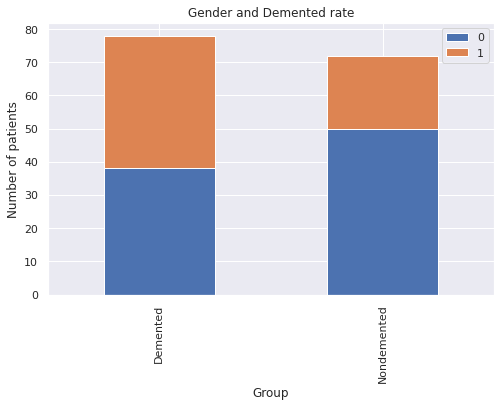

In [5]:
# Cinsiyet  ve grup ( Kadın(Female)=0, Erkek(Male)=1)
bar_chart('M/F')
plt.xlabel('Group')
plt.ylabel('Number of patients')
plt.legend()
plt.title('Gender and Demented rate')

(15.3, 30.0)

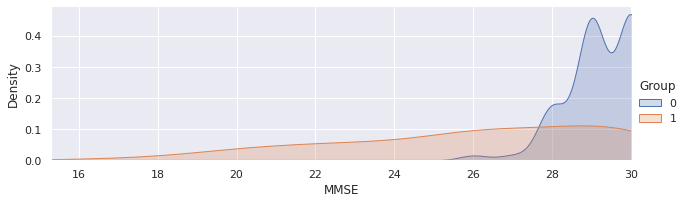

In [6]:
#MMSE :Mini Mental Durum Muayenesi (Mini Mental State Examination)
# Nondemented(Demans olmayan) = 0, Demented(Demanslı) =1
# Demans olmayan 25 ila 30 arasında değişen daha yüksek test sonucuna sahiptir.
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'MMSE',shade= True)
facet.set(xlim=(0, df['MMSE'].max()))
facet.add_legend()
plt.xlim(15.30)

(0.6, 0.9)

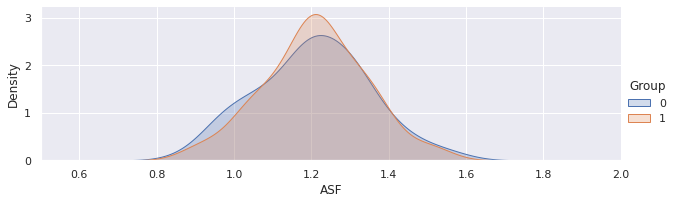

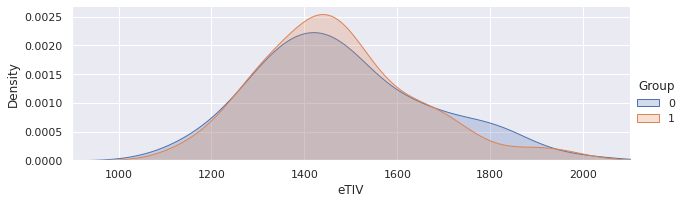

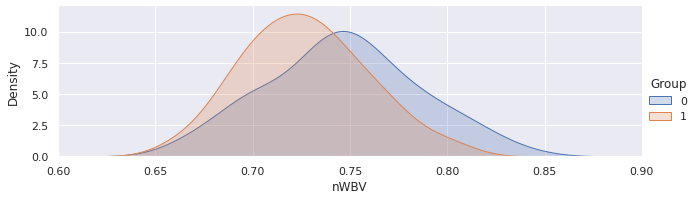

In [7]:
#bar_chart('ASF') = Atlas Ölçeklendirme Faktörü
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'ASF',shade= True)
facet.set(xlim=(0, df['ASF'].max()))
facet.add_legend()
plt.xlim(0.5, 2)

#eTIV = Tahmini Toplam Kafa İçi Hacim (Estimated Total Intracranial Volume)
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'eTIV',shade= True)
facet.set(xlim=(0, df['eTIV'].max()))
facet.add_legend()
plt.xlim(900, 2100)

#'nWBV' = Normalleştirilmiş Tüm Beyin Hacmi (Normalized Whole Brain Volume)
# Demans olmayan = 0, Demanslı =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'nWBV',shade= True)
facet.set(xlim=(0, df['nWBV'].max()))
facet.add_legend()
plt.xlim(0.6,0.9)

(50.0, 100.0)

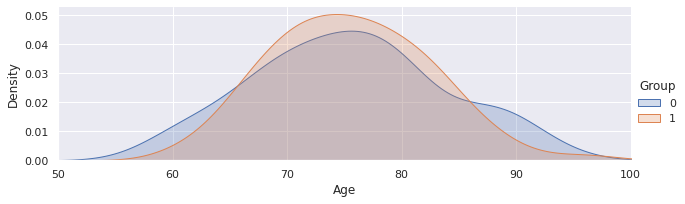

In [8]:
#Yaş . Demans olmayan =0, Demanslı =0
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()
plt.xlim(50,100)

(0.0, 0.16)

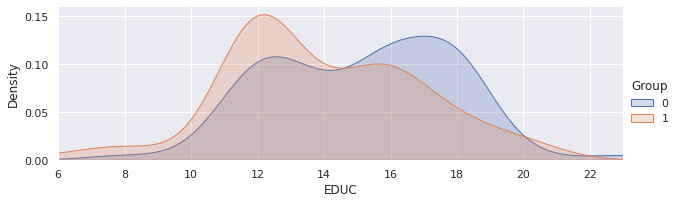

In [9]:
#'EDUC' = Kaç yıl eğitim aldığı
# Demans olmayan = 0, Demanslı =1
facet= sns.FacetGrid(df,hue="Group", aspect=3)
facet.map(sns.kdeplot,'EDUC',shade= True)
facet.set(xlim=(df['EDUC'].min(), df['EDUC'].max()))
facet.add_legend()
plt.ylim(0, 0.16)

In [10]:
#  Her sütun için eksik değerler kontrol edilir
pd.isnull(df).sum() 
# SES sütunu 8 tane eksik değer içermektedir

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           8
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
# SES sütunundaki 8 eksik değer atıldı.
df_dropna = df.dropna(axis=0, how='any')
pd.isnull(df_dropna).sum()

Subject ID    0
Group         0
MR Delay      0
M/F           0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [12]:
df_dropna['Group'].value_counts()

0    72
1    70
Name: Group, dtype: int64

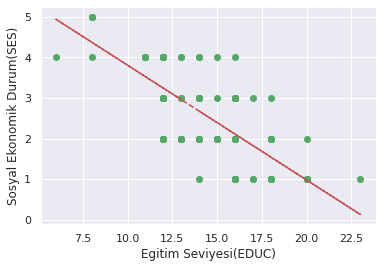

In [13]:
# Eğitim ve SES arasında dağılım grafiği
x = df['EDUC']
y = df['SES']

ses_not_null_index = y[~y.isnull()].index
x = x[ses_not_null_index]
y = y[ses_not_null_index]

# Çizgi kırmızıyla çizilir Eksenler isimlendirilir
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, y, 'go', x, p(x), "r--")
plt.xlabel('Egitim Seviyesi(EDUC)')
plt.ylabel('Sosyal Ekonomik Durum(SES)')

plt.show()

In [14]:
# SES ayrık bir değişken olduğu için, atama için medyan kullanıyoruz.
df.groupby(['EDUC'])['SES'].median()

EDUC
6     4.0
8     5.0
11    4.0
12    3.0
13    2.0
14    3.0
15    2.0
16    2.0
17    1.0
18    2.0
20    1.0
23    1.0
Name: SES, dtype: float64

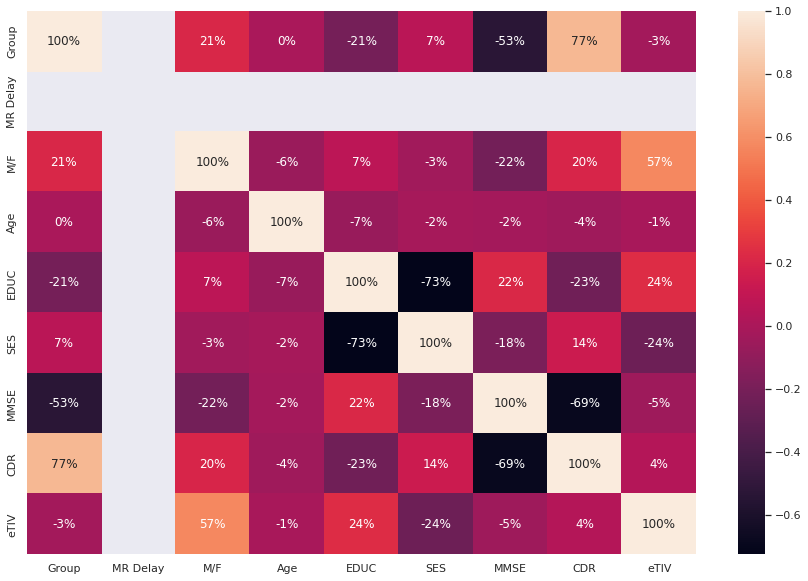

In [15]:
#korelasyonu göstelleştirme
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:10].corr(), annot=True,fmt=".0%")
plt.show()

In [16]:
df["SES"].fillna(df.groupby("EDUC")["SES"].transform("median"), inplace=True)

In [17]:
# Başka eksik değer yok  ve 150 verinin tamamı kullanılıyor.
pd.isnull(df['SES']).value_counts()

False    150
Name: SES, dtype: int64

In [18]:
# Eğitim/Doğrulama/Test Setlerini Bölme
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import cross_val_score

In [24]:
Y = df['Group'].values # Model için hedef grup
X = df[['M/F', 'Age', 'EDUC', 'SES', 'MMSE', 'eTIV', 'nWBV', 'ASF']] # Kullanılan özellikler

# 4 değişken oluşturuldu
X_trainval, X_test, Y_trainval, Y_test = train_test_split(
    X, Y, random_state=0)

# Özellik ölçeklendirme
scaler = MinMaxScaler().fit(X_trainval)
X_trainval_scaled = scaler.transform(X_trainval)
X_test_scaled = scaler.transform(X_test)
print("X train : ",len(X_trainval))
print("X test : ",len(X_test))
print("Y train : ",len(Y_trainval))
print("Y test : ",len(Y_test))

X train :  112
X test :  38
Y train :  112
Y test :  38


In [20]:
print("Eğitim dizisinin boyuları: ",X_trainval.shape)
print("Test dizisinin boyutları : ",X_test.shape)

Eğitim dizisinin boyuları:  (112, 8)
Test dizisinin boyutları :  (38, 8)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc

In [25]:
acc = [] #Tüm performans metriklerini depolamak için bir array oluşturuldu.

In [26]:
best_score=0
kfolds=10 # Çarpaz doğrulama için k sayısını ayarlama

for c in [0.001, 0.1, 1, 10, 100]:
    logRegModel = LogisticRegression(C=c)
    # Çapraz doğrulama gerçekleştir
    scores = cross_val_score(logRegModel, X_trainval, Y_trainval, cv=kfolds, scoring='accuracy') # Her parametre ayarı için geri çağırma alın
    
    # hesaplama ortalama çapraz doğrulama doğruluğu
    score = np.mean(scores)
    
    # En iyi parametreleri ve puanı bulun
    if score > best_score:
        best_score = score
        best_parameters = c

# Birleşik eğitim ve doğrulama setinde bir modeli yeniden oluşturulur
SelectedLogRegModel = LogisticRegression(C=best_parameters).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedLogRegModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedLogRegModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

Best accuracy on validation set is: 0.7242424242424244
Best parameter for regularization (C) is:  100
Test accuracy with best C parameter is 0.7894736842105263
Test recall with the best C parameter is 0.7
Test AUC with the best C parameter is 0.7944444444444444


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [27]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #C parametresi için denememiz gereken değerler üzerinde yineleme yapılır
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #gama parametresi için denememiz gereken değerler üzerinde yineleme yapılır
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # kernel parametresi için denememiz gereken değerler üzerinde yineleme yapılır
            svmModel = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #modeli tanımla
            # çapraz doğrulama gerçekleştirilir.
            scores = cross_val_score(svmModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
            # eğitim seti dahili olarak eğitim ve çapraz doğrulama olarak bölünecektir

            #  ortalama çapraz doğrulama doğruluğu hesaplama
            score = np.mean(scores)
          
            if score > best_score:
                best_score = score 
                best_parameter_c = c_paramter 
                best_parameter_gamma = gamma_paramter
                best_parameter_k = k_parameter
             
SelectedSVMmodel = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_trainval_scaled, Y_trainval)

test_score = SelectedSVMmodel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedSVMmodel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.7590909090909091
Best parameter for c is:  0.001
Best parameter for gamma is:  10
Best parameter for kernel is:  poly
Test accuracy with the best parameters is 0.7894736842105263
Test recall with the best parameters is 0.7
Test recall with the best parameter is 0.7944444444444444


In [33]:
def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):

    plt.figure(figsize=(5, 5), dpi=100)
    np.set_printoptions(precision=2)

    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=15, va='center', ha='center')
    
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')
  
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)
    
 
    plt.savefig(savename, format='png')
    plt.show()

In [31]:
classes=['Nondemented','Demented']

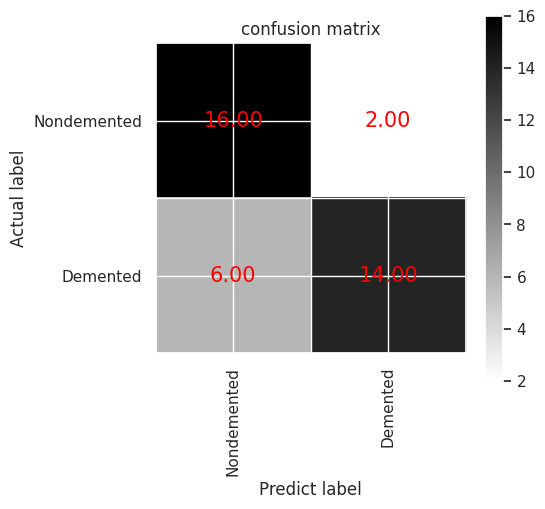

In [34]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [35]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, PredictedOutput))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        18
           1       0.88      0.70      0.78        20

    accuracy                           0.79        38
   macro avg       0.80      0.79      0.79        38
weighted avg       0.81      0.79      0.79        38



In [36]:
acc

[['Logistic Regression (w/ imputation)',
  0.7894736842105263,
  0.7,
  0.7944444444444444,
  array([0.  , 0.11, 1.  ]),
  array([0. , 0.7, 1. ]),
  array([2, 1, 0])],
 ['SVM',
  0.7894736842105263,
  0.7,
  0.7944444444444444,
  array([0.  , 0.11, 1.  ]),
  array([0. , 0.7, 1. ]),
  array([2, 1, 0])]]

In [37]:
best_score = 0

for md in range(1, 9):
   
    treeModel = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
   
    scores = cross_val_score(treeModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')
 
    score = np.mean(scores)

    if score > best_score:
        best_score = score
        best_parameter = md
        
SelectedDTModel = DecisionTreeClassifier(max_depth=best_parameter).fit(X_trainval_scaled, Y_trainval )

test_score = SelectedDTModel.score(X_test_scaled, Y_test)
PredictedOutput = SelectedDTModel.predict(X_test_scaled)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7772727272727272
Best parameter for the maximum depth is:  1
Test accuracy with best parameter is  0.8157894736842105
Test recall with best parameters is  0.65
Test AUC with the best parameter is  0.825


In [38]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedDTModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.0'],
       ['Age', '0.0'],
       ['EDUC', '0.0'],
       ['SES', '0.0'],
       ['MMSE', '1.0'],
       ['eTIV', '0.0'],
       ['nWBV', '0.0'],
       ['ASF', '0.0']], dtype='<U32')

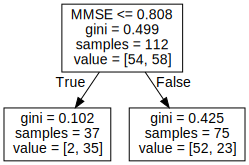

In [39]:
from sklearn.tree import export_graphviz
import graphviz 
dot_data=export_graphviz(SelectedDTModel, feature_names=X_trainval.columns.values.tolist(),out_file=None)
graph = graphviz.Source(dot_data)  
graph 

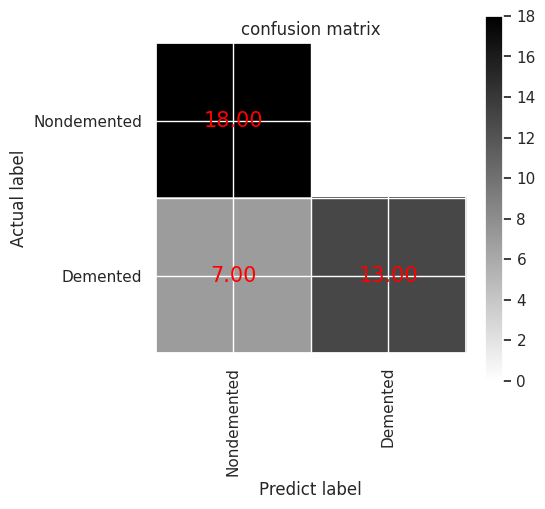

In [40]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [41]:
best_score = 0

for M in range(2, 15, 2): 
    for d in range(1, 9): 
        for m in range(1, 9): 
           
            forestModel = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
           
            scores = cross_val_score(forestModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

         
            score = np.mean(scores)

      
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m
    
SelectedRFModel = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedRFModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7878787878787878
Best parameters of M, d, m are:  6 6 6
Test accuracy with the best parameters is 0.868421052631579
Test recall with the best parameters is: 0.8
Test AUC with the best parameters is: 0.8722222222222222


In [42]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedRFModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.03503132427481025'],
       ['Age', '0.09551237125526228'],
       ['EDUC', '0.06261556797214127'],
       ['SES', '0.060620327518549066'],
       ['MMSE', '0.4006565962793097'],
       ['eTIV', '0.07005497528287095'],
       ['nWBV', '0.1460571117936201'],
       ['ASF', '0.1294517256234364']], dtype='<U32')

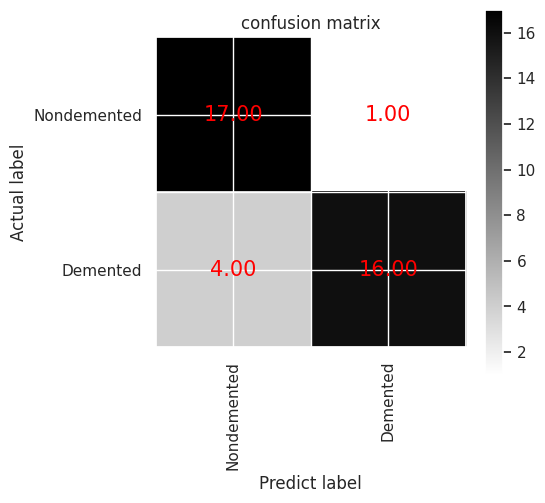

In [43]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [45]:
best_score = 0

for M in range(2, 15, 2): 
    for lr in [0.0001, 0.001, 0.01, 0.1, 1]:
       
        boostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0)
        scores = cross_val_score(boostModel, X_trainval_scaled, Y_trainval, cv=kfolds, scoring='accuracy')

        score = np.mean(scores)

        if score > best_score:
            best_score = score
            best_M = M
            best_lr = lr

       
SelectedBoostModel = AdaBoostClassifier(n_estimators=M, learning_rate=lr, random_state=0).fit(X_trainval_scaled, Y_trainval )

PredictedOutput = SelectedBoostModel.predict(X_test_scaled)
test_score = SelectedRFModel.score(X_test_scaled, Y_test)
test_recall = recall_score(Y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(Y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter of M is: ", best_M)
print("best parameter of LR is: ", best_lr)
print("Test accuracy with the best parameter is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'AdaBoost'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.7772727272727272
Best parameter of M is:  2
best parameter of LR is:  0.0001
Test accuracy with the best parameter is 0.868421052631579
Test recall with the best parameters is: 0.65
Test AUC with the best parameters is: 0.825


In [46]:
print("Feature importance: ")
np.array([X.columns.values.tolist(), list(SelectedBoostModel.feature_importances_)]).T

Feature importance: 


array([['M/F', '0.07142857142857142'],
       ['Age', '0.14285714285714285'],
       ['EDUC', '0.21428571428571427'],
       ['SES', '0.07142857142857142'],
       ['MMSE', '0.14285714285714285'],
       ['eTIV', '0.21428571428571427'],
       ['nWBV', '0.14285714285714285'],
       ['ASF', '0.0']], dtype='<U32')

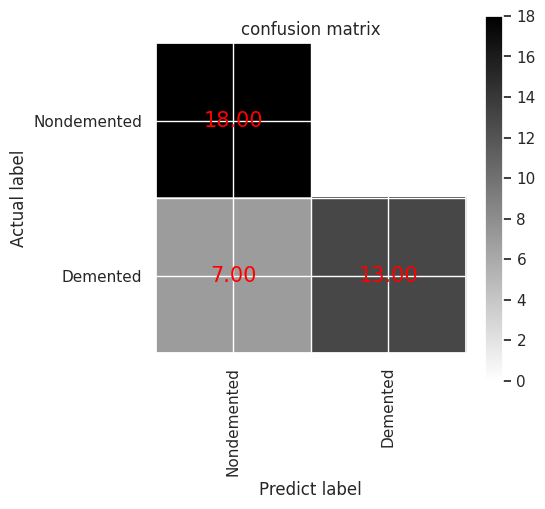

In [47]:
cm = confusion_matrix(Y_test, PredictedOutput)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')

In [48]:
# Her model için yöntemlerin performansları
result = pd.DataFrame(acc, columns=['Model', 'Accuracy', 'Recall', 'AUC', 'FPR', 'TPR', 'TH'])
result[['Model', 'Accuracy', 'Recall', 'AUC']]

,Model,Accuracy,Recall,AUC
0,Logistic Regression (w/ imputation),0.789474,0.70,0.794444
1,SVM,0.789474,0.70,0.794444
2,Decision Tree,0.815789,0.65,0.825000
3,Random Forest,0.868421,0.80,0.872222
4,AdaBoost,0.868421,0.65,0.825000
5,AdaBoost,0.868421,0.65,0.825000
